In [1]:

!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 44kB/s 
     |████████████████████████████████| 4.3MB 43.1MB/s 
     |████████████████████████████████| 501kB 55.1MB/s 


In [0]:
from google.colab import files
import pandas as pd

In [4]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download iarunava/cell-images-for-detecting-malaria

 97% 326M/337M [00:04<00:00, 115MB/s] 
100% 337M/337M [00:05<00:00, 70.7MB/s]


In [0]:
! mkdir cell_images

In [10]:
! unzip cell-images-for-detecting-malaria.zip -d cell_images

Archive:  cell-images-for-detecting-malaria.zip
   creating: cell_images/cell_images/
   creating: cell_images/cell_images/Parasitized/
 extracting: cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
 extracting: cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_1

In [11]:
ls

cell_images/  cell-images-for-detecting-malaria.zip  kaggle.json  sample_data/


In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.0.0-rc0


In [0]:

import numpy as np
import matplotlib.pyplot as plt

In [0]:
img_width = 64
img_height = 64

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [16]:
train_data_generator = datagen.flow_from_directory(directory='/content/cell_images/cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [17]:
validation_data_generator = datagen.flow_from_directory(directory='/content/cell_images/cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [18]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [22]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))


Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 152s 110ms/step - loss: 0.5000 - accuracy: 0.7624 - val_loss: 0.2930 - val_accuracy: 0.9171
Epoch 2/5
1378/1378 [==============================] - 150s 109ms/step - loss: 0.2687 - accuracy: 0.9200 - val_loss: 0.2025 - val_accuracy: 0.9310
Epoch 3/5
1378/1378 [==============================] - 151s 109ms/step - loss: 0.2023 - accuracy: 0.9394 - val_loss: 0.1739 - val_accuracy: 0.9407
Epoch 4/5
1378/1378 [==============================] - 151s 109ms/step - loss: 0.1859 - accuracy: 0.9438 - val_loss: 0.1712 - val_accuracy: 0.9472
Epoch 5/5
1378/1378 [==============================] - 152s 110ms/step - loss: 0.1761 - accuracy: 0.9470 - val_loss: 0.1686 - val_accuracy: 0.9448


In [23]:
history.history

{'accuracy': [0.76242745, 0.91999274, 0.93940496, 0.94380444, 0.9470247],
 'loss': [0.4999557010645617,
  0.26874619557729046,
  0.2023164941415634,
  0.18594192882529387,
  0.17611205577478622],
 'val_accuracy': [0.9170599, 0.9310345, 0.9406534, 0.94718695, 0.94482756],
 'val_loss': [0.2930185677672642,
  0.20253835542910342,
  0.17392133606084878,
  0.17122788557755775,
  0.1685735196792993]}

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()


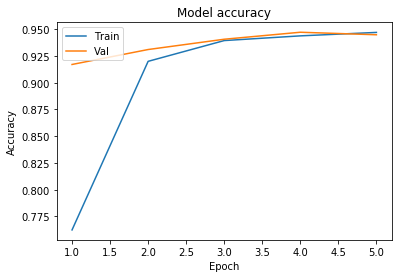

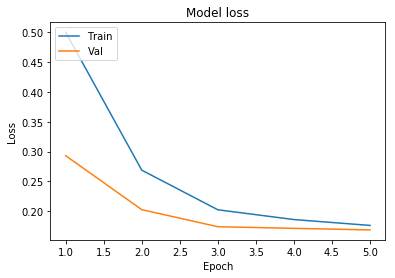

In [25]:
plot_learningCurve(history, 5)